In [127]:
from numpy import *
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import norm
import scipy.stats as stats
import math
from matplotlib.pyplot import figure
from sklearn.naive_bayes import GaussianNB
from sklearn import svm

**Q1**

In [128]:
def est_gaus_par(X):
    mu = np.mean(X,axis=0)
    sig = np.std(X,axis=0)
    return mu,sig

In [129]:
mean_1 = array([-3, 5]) # mu
cov_1 = matrix([
    [2, 1],
    [1, 3]
]) #sigma
x_1, y_1 = np.random.multivariate_normal(mean_1, cov_1, 30).T

X_1 = np.stack((np.array(x_1), np.array(y_1)), axis=-1) # [x, y]

mu_1, sigma_1 = est_gaus_par(X_1)

In [130]:
mean_2 = array([3, 5]) # mu
cov_2 = matrix([
    [2, -1],
    [-1, 3]
]) #sigma
x_2, y_2 = np.random.multivariate_normal(mean_2, cov_2, 40).T

X_2 = np.stack((np.array(x_2), np.array(y_2)), axis=-1)

mu_2, sigma_2 = est_gaus_par(X_2)

In [131]:
sample_1 = np.stack((np.array(x_1), np.array(y_1)), axis=-1)
sample_2 = np.stack((np.array(x_2), np.array(y_2)), axis=-1)
X = np.concatenate((sample_1, sample_2)).astype('float')
y = np.concatenate((np.zeros(30), np.ones(40))).astype('int')

**Q2**

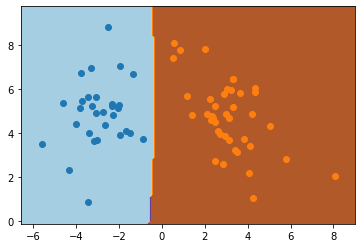

In [132]:
def decision_boundry_cotour(X, y):
    # define bounds of the domain
    min1, max1 = X[:, 0].min()-1, X[:, 0].max()+1
    min2, max2 = X[:, 1].min()-1, X[:, 1].max()+1

    # define the x and y scale
    x1grid = np.arange(min1, max1, 0.1)
    x2grid = np.arange(min2, max2, 0.1)

    # create all of the lines and rows of the grid
    xx, yy = np.meshgrid(x1grid, x2grid)

    # flatten each grid to a vector
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

    # horizontal stack vectors to create x1,x2 input for the model
    grid = np.hstack((r1,r2))

    # define the model
    model = GaussianNB()

    # # fit the model
    model.fit(X, y)

    # make predictions for the grid
    yhat = model.predict(grid)

    # reshape the predictions back into a grid
    zz = yhat.reshape(xx.shape)

    # plot the grid of x, y and z values as a surface
    plt.contourf(xx, yy, zz, cmap='Paired')

    # create scatter plot for samples from each class
    for class_value in [0, 1]:
        # get row indexes for samples with this class
        row_ix = np.where(y == class_value)
        # create scatter of these samples
        plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired')

    mu_1, sigma_1 = est_gaus_par(x_1)
    mu_2, sigma_2 = est_gaus_par(x_2)

decision_boundry_cotour(X, y)

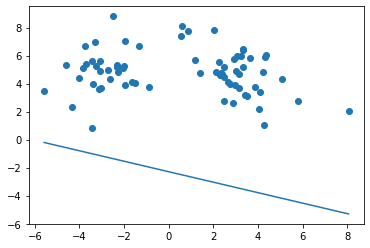

In [133]:
#!/usr/bin/env python

"""Example for a linear classifier using a perceptron and the delta rule."""

from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt

import numpy as np


class Perceptron(object):
    def __init__(self, eta=0.5, epochs=50):
        self.eta = eta
        self.epochs = epochs

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

# Fit perceptron
f = Perceptron(epochs=100, eta=0.2)
f.fit(X, y)
print(f)

# Plot decision boundary
xs = np.linspace(start=min(X[:, 0]), stop=max(X[:, 0]))
plt.plot(xs, [-(f.w_[0] + f.w_[1] * xi) / f.w_[2] for xi in xs], "-")

# Plot data
plt.gray()
_ = plt.scatter(X[:, 0], X[:, 1])
plt.show()

**Q3**

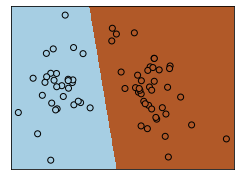

In [134]:
from sklearn.linear_model import LogisticRegression

def logestic_reg(X, y):
    model = LogisticRegression()
    model.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = .02  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)

    plt.figure(1, figsize=(4, 3))
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())

    plt.show()

logestic_reg(X, y)

**Q4**

{'C': 1, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
{'C': 0.05, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


ValueError: C <= 0

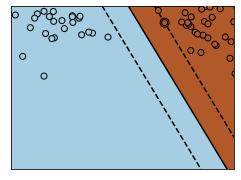

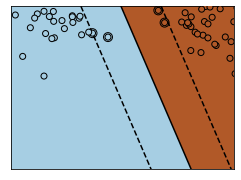

In [135]:
def custom_svm(X, y):
    Y = y

    # figure number
    fignum = 1

    # fit the model
    for name, penalty in (('unreg', 1), ('unreg', 0.05), ('unreg', 0.5), ('unreg', 1)):

        clf = svm.SVC(kernel='linear', C=penalty)
        clf.fit(X, Y)

        # get the separating hyperplane
        w = clf.coef_[0]
        a = -w[0] / w[1]
        xx = np.linspace(-5, 5)
        yy = a * xx - (clf.intercept_[0]) / w[1]

        # plot the parallels to the separating hyperplane that pass through the
        # support vectors (margin away from hyperplane in direction
        # perpendicular to hyperplane). This is sqrt(1+a^2) away vertically in
        # 2-d.
        margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
        yy_down = yy - np.sqrt(1 + a ** 2) * margin
        yy_up = yy + np.sqrt(1 + a ** 2) * margin

        # plot the line, the points, and the nearest vectors to the plane
        plt.figure(fignum, figsize=(4, 3))
        plt.clf()
        plt.plot(xx, yy, 'k-')
        plt.plot(xx, yy_down, 'k--')
        plt.plot(xx, yy_up, 'k--')

        plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
                    facecolors='none', zorder=10, edgecolors='k')
        plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired,
                    edgecolors='k')

        plt.axis('tight')
        x_min = -4.8
        x_max = 4.2
        y_min = -6
        y_max = 6

        XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
        Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(XX.shape)
        plt.figure(fignum, figsize=(4, 3))
        plt.pcolormesh(XX, YY, Z, cmap=plt.cm.Paired)

        plt.xlim(x_min, x_max)
        plt.ylim(y_min, y_max)

        plt.xticks(())
        plt.yticks(())
        fignum = fignum + 1

        print(clf.get_params())

    plt.show()
    
custom_svm(X, y)

In [ ]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


def svm_with_different_options(X, y):
    # we create an instance of SVM and fit out data. We do not scale our
    # data since we want to plot the support vectors
    C = 1.0  # SVM regularization parameter
    models = (svm.SVC(kernel='linear', C=C),
              svm.LinearSVC(C=C, max_iter=10000),
              svm.SVC(kernel='rbf', gamma=0.7, C=C),
              svm.SVC(kernel='poly', degree=3, gamma='auto', C=C))
    models = (clf.fit(X, y) for clf in models)

    # title for the plots
    titles = ('SVC with linear kernel',
              'LinearSVC (linear kernel)',
              'SVC with RBF kernel',
              'SVC with polynomial (degree 3) kernel')

    # Set-up 2x2 grid for plotting.
    fig, sub = plt.subplots(2, 2)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1)

    for clf, title, ax in zip(models, titles, sub.flatten()):
        plot_contours(ax, clf, xx, yy,
                      cmap=plt.cm.coolwarm, alpha=0.8)
        ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xlabel('Sepal length')
        ax.set_ylabel('Sepal width')
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(title)

    plt.show()

svm_with_different_options(X, y)

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.utils import check_random_state
from sklearn import datasets

rnd = check_random_state(1)

# set up dataset
n_samples = 100
n_features = 300

# l1 data (only 5 informative features)
X_1, y_1 = datasets.make_classification(n_samples=n_samples,
                                        n_features=n_features, n_informative=5,
                                        random_state=1)

# l2 data: non sparse, but less features
y_2 = np.sign(.5 - rnd.rand(n_samples))
X_2 = rnd.randn(n_samples, n_features // 5) + y_2[:, np.newaxis]
X_2 += 5 * rnd.randn(n_samples, n_features // 5)

clf_sets = [(LinearSVC(penalty='l1', loss='squared_hinge', dual=False,
                       tol=1e-3),
             np.logspace(-2.3, -1.3, 10), X, y),
            (LinearSVC(penalty='l2', loss='squared_hinge', dual=True),
             np.logspace(-4.5, -2, 10), X, y)]

colors = ['navy', 'cyan', 'darkorange']
lw = 2

for clf, cs, X, y in clf_sets:
    # set up the plot for each regressor
    fig, axes = plt.subplots(nrows=2, sharey=True, figsize=(9, 10))

    for k, train_size in enumerate(np.linspace(0.3, 0.7, 3)[::-1]):
        param_grid = dict(C=cs)
        # To get nice curve, we need a large number of iterations to
        # reduce the variance
        grid = GridSearchCV(clf, refit=False, param_grid=param_grid,
                            cv=ShuffleSplit(train_size=train_size,
                                            test_size=.3,
                                            n_splits=250, random_state=1))
        grid.fit(X, y)
        scores = grid.cv_results_['mean_test_score']

        scales = [(1, 'No scaling'),
                  ((n_samples * train_size), '1/n_samples'),
                  ]

        for ax, (scaler, name) in zip(axes, scales):
            ax.set_xlabel('C')
            ax.set_ylabel('CV Score')
            grid_cs = cs * float(scaler)  # scale the C's
            ax.semilogx(grid_cs, scores, label="fraction %.2f" %
                        train_size, color=colors[k], lw=lw)
            ax.set_title('scaling=%s, penalty=%s, loss=%s' %
                         (name, clf.penalty, clf.loss))

    plt.legend(loc="best")
plt.show()

**Q5**

In [ ]:
new_X = [[-20, 20], [18, 20], [0, 40], [-20, -30], [50, 0]]
new_X = np.concatenate((X, new_X), axis=0)
new_y = np.concatenate((y, np.ones(5)), axis=0)

decision_boundry_cotour(new_X, new_y)

In [ ]:
logestic_reg(new_X, new_y)

In [ ]:
custom_svm(new_X, new_y)

In [ ]:
svm_with_different_options(new_X, new_y)

**Q6**

In [ ]:
mean_3 = array([0, 10]) # mu
cov_3 = matrix([
    [2, 1],
    [1, 3]
]) #sigma
x_3, y_3 = np.random.multivariate_normal(mean_3, cov_3, 50).T

X_3 = np.stack((np.array(x_3), np.array(y_3)), axis=-1) # [x, y]

mu_3, sigma_3 = est_gaus_par(X_3)

In [ ]:
sample_3 = np.stack((np.array(x_3), np.array(y_3)), axis=-1)
X = np.concatenate((sample_1, sample_2, sample_3)).astype('float')
y = np.concatenate((np.zeros(30), np.ones(40), np.ones(50) + 1)).astype('int')

In [ ]:
decision_boundry_cotour(X, y)

In [ ]:
logestic_reg(X, y)

In [ ]:
custom_svm(X, y)

In [ ]:
svm_with_different_options(X, y)